LOADING DATASET

In [1]:
import pandas as pd

In [2]:
tvd = pd.read_csv("tv_data.csv")

In [3]:
tvd.head()

,TV,Sales
0,12.5,44.7
1,14.8,50.2
2,10.2,37.8
3,12.9,43.8
4,23.9,60.3


In [4]:
tvd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
TV       50 non-null float64
Sales    50 non-null float64
dtypes: float64(2)
memory usage: 880.0 bytes


In [5]:
tvd.shape

(50, 2)

In [6]:
tvd.describe()

,TV,Sales
count,50.000000,50.000000
mean,28.720000,74.638000
std,11.128874,20.873505
min,7.200000,34.400000
25%,19.600000,58.200000
50%,27.900000,71.050000
75%,37.450000,89.275000
max,47.500000,112.700000


PLOTTING DATA

In [7]:
import seaborn as sns
%matplotlib inline

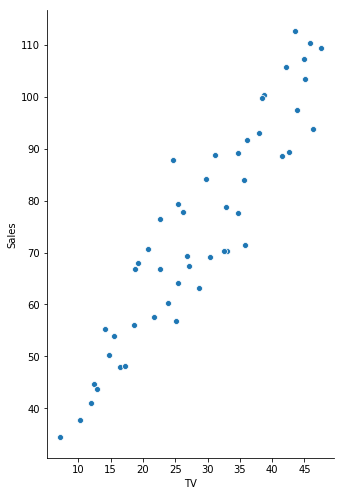

In [9]:
sns.pairplot(tvd, x_vars=["TV"], y_vars=["Sales"], height=7, aspect=0.7, kind="scatter")

DIVIDING DATA IN x AND y (Co-efficient and Intercept)

In [9]:
x = tvd["TV"]
x.head()

0    12.5
1    14.8
2    10.2
3    12.9
4    23.9
Name: TV, dtype: float64

In [10]:
y = tvd["Sales"]
y.head()

0    44.7
1    50.2
2    37.8
3    43.8
4    60.3
Name: Sales, dtype: float64

MAKING TRAIN AND TEST SETS

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, ,y train_size=0.6, random_state=50)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [12]:
import numpy as np
x_train = x_train[:,np.newaxis]
x_test = x_test[:,np.newaxis]

In [14]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(30, 1)
(20, 1)
(30,)
(20,)


CREATING AND FITTING VALUES IN LINEAR MODEL

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [19]:
print(lr.intercept_)
print(lr.coef_)

30.821118687013033
[1.51752824]


In [20]:
y_pred = lr.predict(x_test)

In [21]:
type(y_pred)

numpy.ndarray

VISUALISING RESULTS (ERRORS AND ACCURACY)

Text(0,0.5,'Sales')

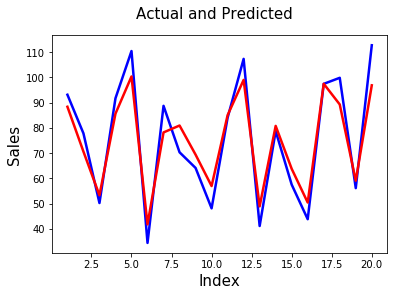

In [30]:
import matplotlib.pyplot as plt
c = [i for i in range(1,21,1)]
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_pred, color="red", linewidth=2.5, linestyle="-")
fig.suptitle("Actual and Predicted", fontsize=15)
plt.xlabel("Index", fontsize=15)
plt.ylabel("Sales", fontsize=15)

Text(0,0.5,'y_test - y_pred')

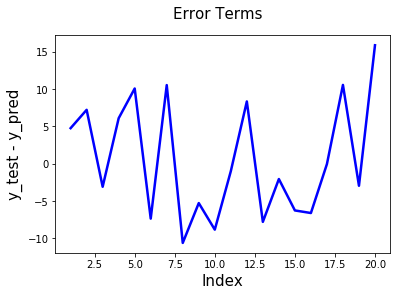

In [31]:
a = [i for i in range(1,21,1)]
fig = plt.figure()
plt.plot(a,y_test-y_pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle("Error Terms", fontsize=15)
plt.xlabel("Index", fontsize=15)
plt.ylabel("y_test - y_pred", fontsize=15)

In [36]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print("Error:",mse)
print("Accuracy:",score*100)

Error: 59.7776761972461
Accuracy: 89.73129294588225


Text(0,0.5,'Predicted_y')

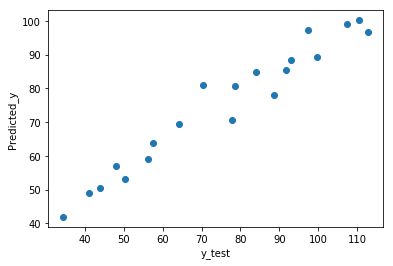

In [34]:
plt.scatter(y_test,y_pred)
plt.xlabel("y_test")
plt.ylabel("Predicted_y")